# Initial Data Understanding and Cleansing
## Notebook 1
###

### Importing needed packages:

In [1]:
# to hide all warnings:
import warnings
warnings.filterwarnings('ignore')

# for data manipulation and analysis
import numpy as np
import pandas as pd

# visualisation tools
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats

# ML libraries
# not needed for now

### Importing the data:

In [2]:
data = pd.read_csv('data_uncleaned/train.csv', low_memory=False)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

#### Checking the shape of the dataset and missing values

##### Total missing values per feature:

In [3]:
data.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                             0
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit            0
Num_Credit_Inquiries         1965
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour               0
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

##### Dimensions of data:

In [4]:
data.shape

(100000, 28)

The DataFrame comprises of 100,000 rows and 28 columns, each representing a certain feature of the dataset. Below a brief explanation of each column is demontrated:

- Index: A default column provided by pandas, serving as a unique identifier for each row.
- ID: Object type column which presumably contains unique identifiers for something, possibly transactions.
- Customer_ID: Object type column generally holding unique identifiers for customers.
- Month: A string that symbolically represents the creation date of the record.
- Name: The names of individuals which seems to have 9985 missing values.
- Age: Likely representing the ages of individuals.
- SSN: Contains the Social Security Number, a unique number identifying each individual.
- Occupation: Likely holds informations regarding the occupations of the customers.
- Annual_Income: A string representation of an individual's annual income.
- Monthly_Inhand_Salary: A numerical representation of the monthly salary with a mean of around 4194.2, potentially representing real-world currency. It has 15,002 missing values.
- Num_Bank_Accounts: A numerical representation of the number of bank accounts. On average, people in this dataset have around 17 bank accounts which seems very high.
- Num_Credit_Card: Average number of credit cards held is about 22.5.
- Interest_Rate: Interest rates are on average about 72.5%.
- Num_of_Loan: The number of loans held by customers.
- Type_of_Loan: The type of loans held by customers. This column has 11,408 missing values.
- Delay_from_due_date: The number of days of delay from the due date; averages around 21.1 days.
- Num_of_Delayed_Payment: Number of payments that were delayed. This column has 7002 missing values.
- Changed_Credit_Limit: This presumably holds whether the credit limit for customers was changed.
- Num_Credit_Inquiries: The number of credit inquiries, with an average of around 27.8 inquiries. This column has 1965 missing entries.
- Credit_Mix: Likely the type of credit in use.
- Outstanding_Debt: Contains the outstanding debts for customers.
- Credit_Utilization_Ratio: The ratio of the amount of credit used out of the available credit, with customers using an average around 32.3% of their available credit.
- Credit_History_Age: Perhaps the age of the longest held credit account. This column has 9030 missing entries.
- Payment_of_Min_Amount: Whether the customers paid their minimum due on time or not.
- Total_EMI_per_month: The total EMI amount per month, averaged to about 1403.1.
- Amount_invested_monthly: The amount invested every month by customers. This column has 4479 missing entries.
- Payment_Behaviour: The payment behaviour of the customer.
- Monthly_Balance: The monthly balance of the customers. This column has 1200 missing entries.
- Credit_Score: The credit score of the customers.

Plotting missing values:

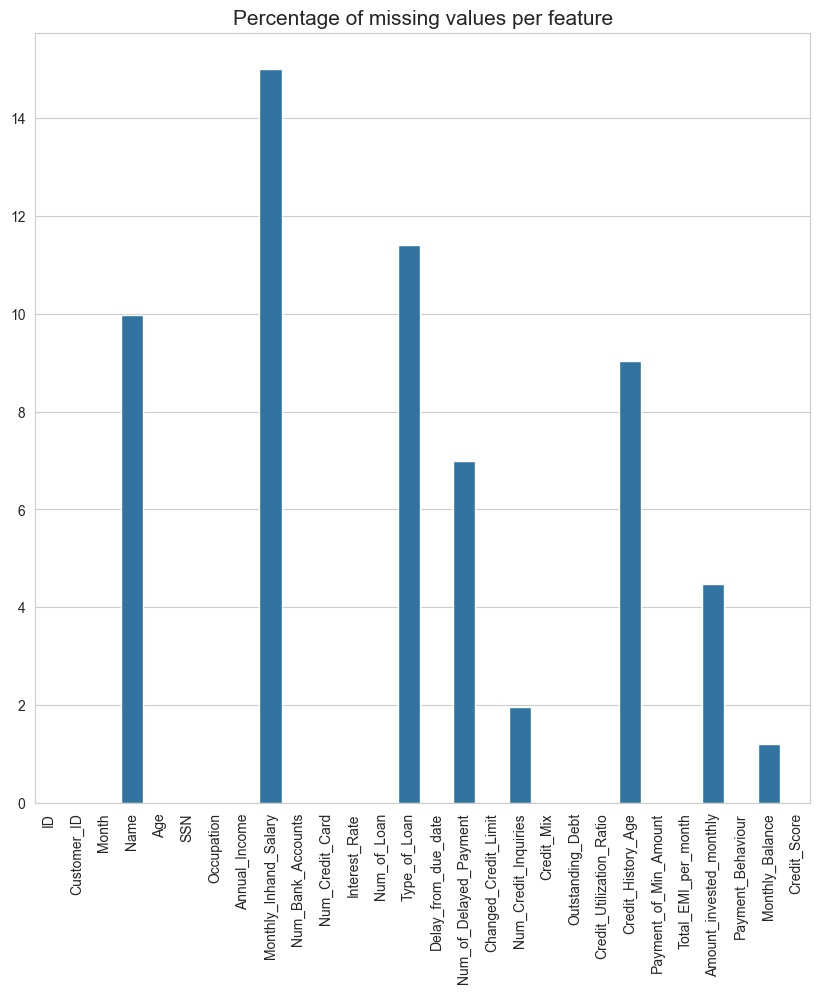

In [5]:
# percentage of missing values plot
plt.figure(figsize=(10,10))
plt.title('Percentage of missing values per feature', fontsize=15)
sns.barplot(data.isnull().mean() * 100)
plt.xticks(rotation=90);

The highest percentage of missing value is 14%. I should investigate if dropping all the rows with missing values is valuable for my analysis:

In [6]:
data_reduced = data.dropna(inplace=False)
data_reduced.shape

(53049, 28)

I reduced the size of the data significantly (From 100000 observations to around 53000). Is this decrease of observations changes the statistical metrics of the data?

In [7]:
# generating descriptive statistics of data dataframe and then transposing the result.
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,84998.0,4194.170850,3183.686167,303.645417,1625.568229,3093.745000,5957.448333,15204.633333
Num_Bank_Accounts,100000.0,17.091280,117.404834,-1.000000,3.000000,6.000000,7.000000,1798.000000
Num_Credit_Card,100000.0,22.474430,129.057410,0.000000,4.000000,5.000000,7.000000,1499.000000
Interest_Rate,100000.0,72.466040,466.422621,1.000000,8.000000,13.000000,20.000000,5797.000000
Delay_from_due_date,100000.0,21.068780,14.860104,-5.000000,10.000000,18.000000,28.000000,67.000000
Num_Credit_Inquiries,98035.0,27.754251,193.177339,0.000000,3.000000,6.000000,9.000000,2597.000000
Credit_Utilization_Ratio,100000.0,32.285173,5.116875,20.000000,28.052567,32.305784,36.496663,50.000000
Total_EMI_per_month,100000.0,1403.118217,8306.041270,0.000000,30.306660,69.249473,161.224249,82331.000000


In [8]:
data_reduced.describe().T

,count,mean,std,min,25%,50%,75%,max
Monthly_Inhand_Salary,53049.0,4024.502617,3094.967739,303.645417,1575.345833,2991.016667,5712.553333,15204.633333
Num_Bank_Accounts,53049.0,16.842806,115.605025,-1.000000,4.000000,6.000000,8.000000,1798.000000
Num_Credit_Card,53049.0,22.787253,129.339640,0.000000,4.000000,6.000000,7.000000,1499.000000
Interest_Rate,53049.0,76.272352,479.226709,1.000000,8.000000,15.000000,22.000000,5797.000000
Delay_from_due_date,53049.0,21.994119,15.220406,-5.000000,10.000000,19.000000,29.000000,67.000000
Num_Credit_Inquiries,53049.0,27.062866,187.185825,0.000000,3.000000,6.000000,9.000000,2594.000000
Credit_Utilization_Ratio,53049.0,32.219031,5.057398,20.881250,28.046338,32.251786,36.408991,49.564519
Total_EMI_per_month,53049.0,1445.924761,8407.429893,4.462837,41.244418,78.418272,169.286269,82331.000000


**The characteristics of numeric features did not change significantly.**

**What are the classes of my target variable?**

In [9]:
data['Credit_Score'].unique()

array(['Good', 'Standard', 'Poor'], dtype=object)

Analysing the proportion of values of target variable:

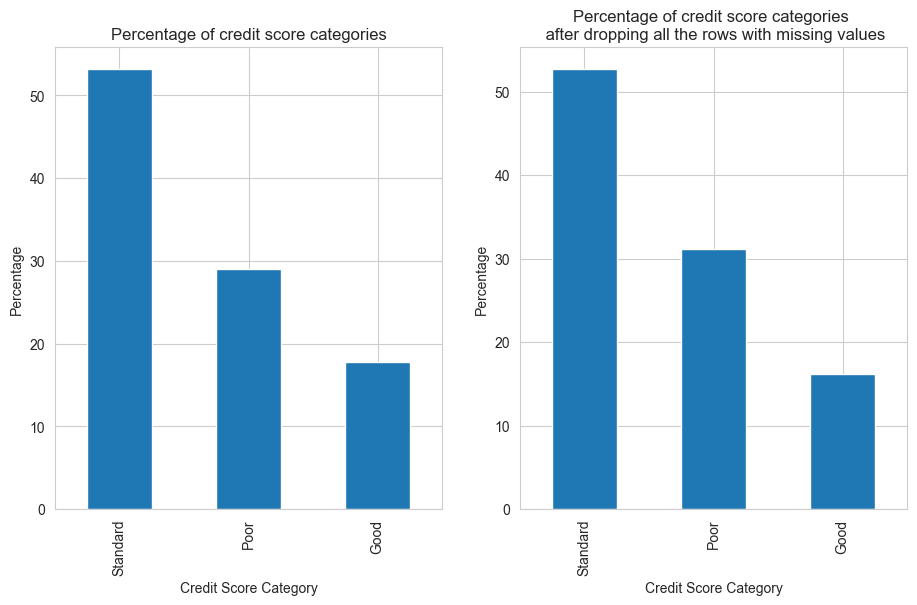

Percentage of credit score categories:
  Credit_Score  proportion
0     Standard      53.174
1         Poor      28.998
2         Good      17.828



Percentage of credit score categories after dropping all the rows with missing values:
  Credit_Score  proportion
0     Standard   52.689023
1         Poor   31.133480
2         Good   16.177496


In [10]:
fig, axs = plt.subplots(1,2, figsize=(11,6))

# Plot for 'data' DataFrame
(data['Credit_Score'].value_counts(normalize = True)*100).plot(kind='bar', ax=axs[0])
axs[0].set_title('Percentage of credit score categories')
axs[0].set_ylabel('Percentage')
axs[0].set_xlabel('Credit Score Category')

# Plot for 'data_reduced' DataFrame
(data_reduced['Credit_Score'].value_counts(normalize = True)*100).plot(kind='bar', ax=axs[1])
axs[1].set_title('Percentage of credit score categories \n after dropping all the rows with missing values')
axs[1].set_ylabel('Percentage')
axs[1].set_xlabel('Credit Score Category')

#plt.tight_layout()
plt.show()

#printing the precentages:
print('Percentage of credit score categories:')
print((data['Credit_Score'].value_counts(normalize = True)*100).reset_index())
print('\n\n')
print('Percentage of credit score categories after dropping all the rows with missing values:')
print((data_reduced['Credit_Score'].value_counts(normalize = True)*100).reset_index())

Detecting strange values apart from the NaN Values ( using data_reduced dataframe )

In [11]:
object_col = data.describe(include='O').columns
object_col


# data[col].value_counts(dropna=False): 
# value_counts() is a function that returns the count of unique items in a pandas Series object.
# The argument dropna=False means it includes the NaN (Not a Number) values as well. 
# By default, the value_counts() function does not include NaN values in its count.

# Column Name: 
# '+col: This prints the text 'Column Name: ' along with the name of the column.

for col in object_col:
    print('Column Name: '+col)
    print("**"*20)
    print(data[col].value_counts(dropna=False))
    print('END', "--"*18, '\n')


Column Name: ID
****************************************
ID
0x1602     1
0x19c88    1
0x19caa    1
0x19ca5    1
0x19ca4    1
          ..
0xd94d     1
0xd94c     1
0xd94b     1
0xd94a     1
0x25fed    1
Name: count, Length: 100000, dtype: int64
END ------------------------------------ 

Column Name: Customer_ID
****************************************
Customer_ID
CUS_0xd40     8
CUS_0x9bf4    8
CUS_0x5ae3    8
CUS_0xbe9a    8
CUS_0x4874    8
             ..
CUS_0x2eb4    8
CUS_0x7863    8
CUS_0x9d89    8
CUS_0xc045    8
CUS_0x942c    8
Name: count, Length: 12500, dtype: int64
END ------------------------------------ 

Column Name: Month
****************************************
Month
January     12500
February    12500
March       12500
April       12500
May         12500
June        12500
July        12500
August      12500
Name: count, dtype: int64
END ------------------------------------ 

Column Name: Name
****************************************
Name
NaN               9985
Stevex  

**Clear the strange values on data dataframe found above. Assign the new dataframe to df**:

In [12]:
def text_cleaning(data):
    if data is np.NaN or not isinstance(data, str):
        return data
    else:
        return str(data).strip('_ ,"')

In [13]:
df = data.map(text_cleaning).replace(['', 'nan', '!@9#%8', '#F%$D@*&8'], np.NaN)
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                   7062
Annual_Income                   0
Monthly_Inhand_Salary       15002
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment       7002
Changed_Credit_Limit         2091
Num_Credit_Inquiries         1965
Credit_Mix                  20195
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age           9030
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly      4479
Payment_Behaviour            7600
Monthly_Balance              1200
Credit_Score                    0
dtype: int64

**I continue with the df dataframe**

### Fixing Data Types using value_counts(), astype(), infer_objects(), convert_dtypes() etc.

#### Changing column type in pandas by using:

1. astype() - convert (almost) any type to (almost) any other type (even if it's not necessarily sensible to do so). Also allows you to convert to categorial types (very useful).
2. infer_objects() - a utility method to convert object columns holding Python objects to a pandas type if possible.
3. convert_dtypes() - convert DataFrame columns to the "best possible" dtype that supports pd.NA (pandas' object to indicate a missing value).
4. to_numeric() - provides functionality to safely convert non-numeric types.(See also to_datetime() and to_timedelta().)
5. factorize() - provides sorting

In [14]:
# 20 object columns:
df.select_dtypes('object').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                   Non-Null Count   Dtype 
---  ------                   --------------   ----- 
 0   ID                       100000 non-null  object
 1   Customer_ID              100000 non-null  object
 2   Month                    100000 non-null  object
 3   Name                     90015 non-null   object
 4   Age                      100000 non-null  object
 5   SSN                      94428 non-null   object
 6   Occupation               92938 non-null   object
 7   Annual_Income            100000 non-null  object
 8   Num_of_Loan              100000 non-null  object
 9   Type_of_Loan             88592 non-null   object
 10  Num_of_Delayed_Payment   92998 non-null   object
 11  Changed_Credit_Limit     97909 non-null   object
 12  Credit_Mix               79805 non-null   object
 13  Outstanding_Debt         100000 non-null  object
 14  Credit_History_Age   

This code below is performing different data transformations on each object column of the df DataFrame, using various functions available in Pandas and Numpy. Here's a breakdown of these operations:

1. **df['ID'] = df.ID.apply(lambda x: int(x, 16)):**
The hexadecimal string IDs are being converted to int type. If df['ID'] originally contains hexadecimal numbers stored as string format, this line will convert those hexadecimal numbers to decimal integers.

2. **df['Customer_ID'] = df.Customer_ID.apply(lambda x: int(x[4:], 16)):**
Here it's slicing Customer_ID values from the 5th character till the end and converting those hexadecimal strings to int type.

3. **df['Month'] = pd.to_datetime(df.Month, format='%B').dt.month:**
This line is converting the Month column to Pandas datetime format, with the assumption that df['Month'] are given as full month names ('January', 'February', etc.). It then extracts the month as an integer (1 for January, 2 for February, etc.).

4. **df['Age'] = df.Age.astype(int):** 
This line is converting the Age column values into integers using the astype(int) function.

5. **df['SSN'] = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float):**
Here, for each value in the SSN field, if the value is not NaN (Not a Number), it is converted to string format, and then all the hyphen ('-') characters are removed. The resulting string is converted to an integer and then to a float. If the value is NaN, it remains NaN.

- 6-12. **For numerical columns 'Annual_Income', 'Num_of_Loan', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Outstanding_Debt', 'Amount_invested_monthly', and 'Monthly_Balance'**, the DataFrame's astype method is used to convert these columns to the float or int data type.

In summary, the below code does type conversion and data cleaning for specific columns of the df pandas DataFrame. The cleaning and transformation done here are necessary for a lot of data processing and machine learning tasks.

In [15]:
df['ID']                      = df.ID.apply(lambda x: int(x, 16))
df['Customer_ID']             = df.Customer_ID.apply(lambda x: int(x[4:], 16))
df['Month']                   = pd.to_datetime(df.Month, format='%B').dt.month
df['Age']                     = df.Age.astype(int)
df['SSN']                     = df.SSN.apply(lambda x: x if x is np.NaN else int(str(x).replace('-', ''))).astype(float)
df['Annual_Income']           = df.Annual_Income.astype(float)
df['Num_of_Loan']             = df.Num_of_Loan.astype(int)
df['Num_of_Delayed_Payment']  = df.Num_of_Delayed_Payment.astype(float)
df['Changed_Credit_Limit']    = df.Changed_Credit_Limit.astype(float)
df['Outstanding_Debt']        = df.Outstanding_Debt.astype(float)
df['Amount_invested_monthly'] = df.Amount_invested_monthly.astype(float)
df['Monthly_Balance']         = df.Monthly_Balance.astype(float)

#### Combining specific object columns
##### Feature: Credit History Age

This function below, named **Month_Converter**, takes a single argument x. The function is intended to convert a string representing a time period in years and months into total months. The function does the following:

1. **if pd.notnull(x)**:
The function first checks if x is not a null value. This is done using the function notnull() from the pandas library.
2. **num1 = int(x.split(' ')[0])**:
It assumes that x is a string in which the first portion before the space is the number of years. It splits the string into different parts at the spaces using split(' '), and it converts the first part num1 (which is the number of years) into an integer.
3. **num2 = int(x.split(' ')[3]):** 
Similar to the previous step, it assumes the string follows a pattern where the 4th portion (index 3) after splitting by space is the number of months. It converts this part num2 into an integer.
4. **return (num1*12)+num2:**
It returns the total number of months by converting the years into months (num1*12) and adding the remaining months (num2).
5. **else: return x:**
If x is a null value, the function simply returns x. This is useful for handling missing data.


The function expects input strings in the format "5 years 2 months" and converts them into an integer representing the total number of months (in this example, it would return 62).

Do note that this function does not handle errors that might arise if the format of the string is not as expected. It's best to make sure the data fits the expected format before applying this function.

In [16]:
def Month_Converter(x):
    """
    Converts a given month in the format "Mmm yyyy" to the total number of months

    :param x: A string representing a month in the format "Mmm yyyy" (e.g. "Jan 2022")
    :return: The total number of months corresponding to the given month (e.g. for "Jan 2022", it would be 20234)
    """
    if pd.notnull(x):
        num1 = int(x.split(' ')[0])
        num2 = int(x.split(' ')[3])

        return (num1*12)+num2
    else:
        return x


In [17]:
#applying function Month_Converter to 'Credit_History_Age':
df['Credit_History_Age'] = df.Credit_History_Age.apply(lambda x: Month_Converter(x)).astype(float)

#check
df.groupby('Customer_ID')['Credit_History_Age'].apply(list).head()

Customer_ID
1006    [182.0, 183.0, 184.0, 185.0, 186.0, 187.0, 188...
1007    [346.0, 347.0, 348.0, 349.0, 350.0, nan, 352.0...
1008    [292.0, 293.0, 294.0, nan, 296.0, 297.0, 298.0...
1009    [331.0, 332.0, 333.0, 334.0, 335.0, 336.0, 337...
1011    [179.0, 180.0, nan, 182.0, 183.0, 184.0, 185.0...
Name: Credit_History_Age, dtype: object

##### Feature: Type of Loan

In [18]:
df['Type_of_Loan'].value_counts(dropna=False)

Type_of_Loan
NaN                                                                                                                                   11408
Not Specified                                                                                                                          1408
Credit-Builder Loan                                                                                                                    1280
Personal Loan                                                                                                                          1272
Debt Consolidation Loan                                                                                                                1264
                                                                                                                                      ...  
Not Specified, Mortgage Loan, Auto Loan, and Payday Loan                                                                                  8
Payday 

The code below contains two lines where the Pandas library in Python is used to process the DataFrame df.

**The applied lambda function does the following**:
- x.lower() - This part transforms the text to lowercase.
- .replace('and ', '') - This part removes the word 'and' followed by a space from the string.
- .replace(', ', ',') - This part replaces the ', ' (comma followed by a space) with ',' (just comma), effectively removing spaces after commas.
- .strip() - This part removes any leading or trailing spaces.
- If x is a NaN value (checked using the pd.notna(x) else x part), it remains unaltered.
df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

The next code line groups the DataFrame by the Customer_ID, then takes the count of unique values in the Type_of_Loan column for each Customer_ID. The value_counts(dropna=False) function counts the number of each unique value in the Type_of_Loan column. The dropna=False parameter means it includes the NaN values in the count.

In summary, the code first cleans up and standardizes the Type_of_Loan column, then displays the occurrence of each type of loan per customer

In [19]:
df['Type_of_Loan'] = df['Type_of_Loan'].apply(lambda x: x.lower().replace('and ', '').replace(', ', ',').strip() if pd.notna(x) else x)

df.groupby('Customer_ID')['Type_of_Loan'].value_counts(dropna=False)

Customer_ID  Type_of_Loan                                                                                
1006         credit-builder loan,payday loan                                                                 8
1007         home equity loan,mortgage loan,student loan                                                     8
1008         NaN                                                                                             8
1009         credit-builder loan,student loan,not specified,student loan                                     8
1011         personal loan,auto loan,auto loan                                                               8
                                                                                                            ..
50984        home equity loan,mortgage loan,payday loan,mortgage loan,mortgage loan,payday loan              8
50990        mortgage loan,auto loan,auto loan                                                               8
50992 

Also, I could create lists of type of loans per Customer ID, where I can map the values inside the lists into different features

In [20]:
df.groupby('Customer_ID')['Type_of_Loan'].apply(list)

Customer_ID
1006     [credit-builder loan,payday loan, credit-build...
1007     [home equity loan,mortgage loan,student loan, ...
1008              [nan, nan, nan, nan, nan, nan, nan, nan]
1009     [credit-builder loan,student loan,not specifie...
1011     [personal loan,auto loan,auto loan, personal l...
                               ...                        
50984    [home equity loan,mortgage loan,payday loan,mo...
50990    [mortgage loan,auto loan,auto loan, mortgage l...
50992    [student loan,credit-builder loan,mortgage loa...
50996             [nan, nan, nan, nan, nan, nan, nan, nan]
50999    [credit-builder loan, credit-builder loan, cre...
Name: Type_of_Loan, Length: 12500, dtype: object

Let's check the different values in the Type of Loan column:

In [21]:
import re 
def get_Diff_Values_Colum(df_column, diff_value=[], sep=',', replace=''):
    """
    Get the different values in a column of a DataFrame.

    :param df_column: The column of the DataFrame.
    :type df_column: pandas.Series
    :param diff_value: Values to exclude from the result. It is an optional parameter and the default value is an empty list.
    :type diff_value: list, optional
    :param sep: Separator for splitting values that contain multiple elements. It is an optional parameter and the default value is ','.
    :type sep: str, optional
    :param replace: Characters to replace in values before processing. It is an optional parameter and the default value is an empty string.
    :type replace: str, optional
    :return: A dictionary containing the different values as keys and their corresponding indexes as values.
    :rtype: dict

    """
    column = df_column.dropna()
    for i in column:
        if sep not in i and i not in diff_value:
            diff_value.append(i)
        else:
            for data in map(lambda x:x.strip(), re.sub(replace, '', i).split(sep)):
                if not data in diff_value:
                    diff_value.append(data)
    return dict(enumerate(sorted(diff_value)))

In [22]:
get_Diff_Values_Colum(df['Type_of_Loan'])

{0: 'auto loan',
 1: 'credit-builder loan',
 2: 'debt consolidation loan',
 3: 'home equity loan',
 4: 'mortgage loan',
 5: 'not specified',
 6: 'payday loan',
 7: 'personal loan',
 8: 'student loan'}

We have 8 unique values  various combinations in column: Type_of_Loans

### Handling missing values on df Dataframe

In [23]:
df.select_dtypes(include = 'object').isna().sum()

Name                      9985
Occupation                7062
Type_of_Loan             11408
Credit_Mix               20195
Payment_of_Min_Amount        0
Payment_Behaviour         7600
Credit_Score                 0
dtype: int64

I should check and handle tha Nan values of the following variables:
- Occupation
- Credit_Mix
- Payment_Behaviour

Below I create a function that handles missing values for Object Columns:


**The below function is defined to handle missing values (NaNs) in a pandas DataFrame based on the mode of a grouped column**.

**Here's a breakdown of the code**:

The function first defines a nested inner function make_NaN_and_fill_mode which replaces 'None' values with 'np.NaN' if any. Then, it fills the missing values with the mode of the column, grouped by the column names stated. The mode is the value that appears most frequently in a data set. It's calculated using scipy.stats.mode.

When the inplace argument is True, the original DataFrame is modified and nothing is returned. If False, a new DataFrame with the modifications is returned.
The primary function checks if inplace is True or False.

If inplace is True, it:
- calculates and prints the count of NaN values in the column before assigning.
- shows a sample of values in the group by column,
- replaces None and NaN values with the mode value using the inner function,
- shows the count of NaN values in the column after assigning,
- shows a sample of the group by column after assigning.

If inplace is False, it simply calls the make_NaN_and_fill_mode function and returns the modified DataFrame.

In [24]:
# Reassign and Show Function
def Object_NaN_Values_Reassign(df, groupby, column, inplace=True):
    """
    :param df: The DataFrame to be modified.
    :param groupby: The column(s) to group the data by.
    :param column: The column to reassign NaN values.
    :param inplace: If True, modify the DataFrame in-place. If False, return a new DataFrame with the NaN values reassigned.
    :return: If inplace=True, returns None. If inplace=False, returns a DataFrame with reassigned NaN values.

    This method reassigns NaN values in a DataFrame column based on the mode of the corresponding groupby column(s).
    """
    import scipy.stats as stats
    import pandas as pd
    def make_NaN_and_fill_mode(df, groupby, column, inplace=True):
        # Assign None to np.NaN
        if df[column].isin([None]).sum():
            df[column][df[column].isin([None])] = np.NaN

        # fill with local mode
        mode_vals = df.groupby(groupby)[column].apply(lambda x: pd.Series.mode(x)[0] if len(pd.Series.mode(x))>0 else np.NaN)

        result = df[column].fillna(df[groupby].map(mode_vals))

        # inplace
        if inplace:
            df[column]=result
        else:
            return result

    # Run      
    if inplace:
        # Before Assigning NaN values   
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        # Assigning
        make_NaN_and_fill_mode(df, groupby, column, inplace)

        # After Assigning NaN values
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nAfter Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')
    else:
        # Show
        return make_NaN_and_fill_mode(df, groupby, column, inplace)

**Handling Occupation variable**:

In [25]:
df['Occupation'].value_counts(dropna=False)

Occupation
NaN              7062
Lawyer           6575
Architect        6355
Engineer         6350
Scientist        6299
Mechanic         6291
Accountant       6271
Developer        6235
Media_Manager    6232
Teacher          6215
Entrepreneur     6174
Doctor           6087
Journalist       6085
Manager          5973
Musician         5911
Writer           5885
Name: count, dtype: int64

In [26]:
Object_NaN_Values_Reassign(df, 'Customer_ID', 'Occupation')


Before Assigning: Occupation: have 7062 NaN Values

Before Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', nan, 'Journalist', 'Journalist']
['Manager', 'Manager', nan, 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', nan, 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant']
['Writer', 'Writer', 'Writer', 'Writer', nan, 'Writer', 'Writer', 'Writer']

After Assigning Example Occupation:

['Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist', 'Journalist']
['Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager', 'Manager']
['Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer', 'Developer']
['Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accountant', 'Accoun

**Everything seems ok. Now I should check Credit_Mix feature**:

In [27]:
df['Credit_Mix'].value_counts(dropna=False)

Credit_Mix
Standard    36479
Good        24337
NaN         20195
Bad         18989
Name: count, dtype: int64

In [28]:
Object_NaN_Values_Reassign(df, 'Customer_ID', 'Credit_Mix')


Before Assigning: Credit_Mix: have 20195 NaN Values

Before Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', nan, 'Standard', 'Standard']
[nan, 'Standard', 'Standard', 'Standard', nan, 'Standard', nan, 'Standard']
[nan, 'Standard', 'Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
[nan, nan, 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']

After Assigning Example Credit_Mix:

['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard', 'Standard']
['Standard', 'Standard', 'Standard', 'Standard', 'Standard',

In [29]:
df['Credit_Mix'].value_counts(dropna=False)

Credit_Mix
Standard    45848
Good        30384
Bad         23768
Name: count, dtype: int64

**In a similar way I handle the missing values of Payment_Behaviour**:

In [30]:
Object_NaN_Values_Reassign(df, 'Customer_ID', 'Payment_Behaviour')


Before Assigning: Payment_Behaviour: have 7600 NaN Values

Before Assigning Example Payment_Behaviour:

['High_spent_Medium_value_payments', 'Low_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', nan, 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_Small_value_payments', nan, 'Low_spent_Small_value_payments', 'Low_spent_Small_value_payments']
['High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Small_value_payments', 'High_spent_Small_value_payments', 'High_spent_Medium_value_payments', 'High_spent_Small_value_payments', 'Low_spent_Large_value_payments', 'Low_spent_Large_value_payments']
['High_spent_Medium_value_payments', 'High_spent_Large_value_payments', 'High_spent_Medium_value_payments', 'Low_spent_

In [31]:
#check the null values:
df.select_dtypes(include = 'object').isna().sum()

Name                      9985
Occupation                   0
Type_of_Loan             11408
Credit_Mix                   0
Payment_of_Min_Amount        0
Payment_Behaviour            0
Credit_Score                 0
dtype: int64

### Handling numeric variables (missing values and outliers)

Below I create a function that gets the lower and upper bounds for outliers based on the interquartile range (IQR). 

In [32]:
# Define Outlier Range
def get_iqr_lower_upper(df, column, multiply=1.5):
    """
    Get the lower and upper bounds for outliers based on the interquartile range (IQR).

    :param df: pandas DataFrame
        The DataFrame containing the data.
    :param column: str
        The column name in the DataFrame.
    :param multiply: float, optional
        The multiplier to determine the threshold for outliers. Default is 1.5.
    :return: tuple
        A tuple containing the lower and upper bounds for outliers.
    """
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 -q1

    lower = q1-iqr*multiply
    upper = q3+iqr*multiply
    affect = df.loc[(df[column]<lower)|(df[column]>upper)].shape
    print('Outlier.shape:', affect)
    return lower, upper

Also, I create a function for numeric variables that identifies and re-assigns wrong numeric values in the df DataFrame based on a specified group (Customer_ID):

In [33]:
# Reassign Wrong Values and Show Function
def Numeric_Wrong_Values_Reassign_Group_Min_Max(df, groupby, column, inplace=True):
    """

    This method, `Numeric_Wrong_Values_Reassign_Group_Min_Max`, is used to identify and reassign wrong numeric values in a pandas DataFrame based on a specified group. 

    :param df: The pandas DataFrame where the wrong values need to be re-assigned. 
    :param groupby: The column(s) in the DataFrame that will be used to group the data.
    :param column: The column containing the values that need to be reassigned.
    :param inplace: A boolean indicating whether the changes should be made directly in the DataFrame or returned as a new object. Default is True, which means the changes will be made inplace
    *.
    :return: If `inplace` is True, there is no return value. If `inplace` is False, the modified DataFrame will be returned.

    """
    # Identify Wrong values Range
    def get_group_min_max(df = df, groupby = groupby, column = column):
        cur = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = cur.apply(lambda x: stats.mode(x)).apply([min, max])
        return x[0], y[0]

    # Assigning Wrong values
    def make_group_NaN_and_fill_mode(df = df, groupby = groupby, column = column, inplace=True):
        df_dropped = df[df[column].notna()].groupby(groupby)[column].apply(list)
        x, y = df_dropped.apply(lambda x: stats.mode(x)).apply([min, max])
        mini, maxi = x[0], y[0]

        # assign Wrong Values to NaN
        col = df[column].apply(lambda x: np.NaN if ((x<mini)|(x>maxi)) else x)

        # fill with local mode
        mode_by_group = df.groupby(groupby)[column].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)
        result = col.fillna(mode_by_group)

        # inplace
        if inplace:
            df[column]=result
        else:
            return result


    # Run      
    if inplace:
        print('***************************', end='\n')
        # Before Assigning NaN values   
        if df[column].value_counts(dropna=False).index.isna().sum():
            x = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {x.values[0]} NaN Values', end='\n')

        print("\nExisting Min, Max Values:", df[column].apply([min, max]), sep='\n', end='\n')
        mini, maxi = get_group_min_max(df, groupby, column)
        print(f"\nGroupby by {groupby}'s Actual min, max Values:", f'min:\t{mini},\nmax:\t{ maxi}', sep='\n', end='\n')

        a = df.groupby(groupby)[column].apply(list)
        print(f'\nBefore Assigning Example {column}:\n', *a.head().values, sep='\n', end='\n')

        # Assigning
        make_group_NaN_and_fill_mode(df, groupby, column, inplace)

        # After Assigning NaN values
        if df[column].value_counts(dropna=False).index.isna().sum():
            y = df[column].value_counts(dropna=False).loc[[np.NaN]]
            print(f'\nBefore Assigning: {column}:', f'have {y.values[0]} NaN Values', end='\n')

        b = df.groupby(groupby)[column].apply(list)
        print(f'\nAfter Assigning Example {column}:\n', *b.head().values, sep='\n', end='\n')

        print('***************************', end='\n')
    else:
        # Show
        return make_group_NaN_and_fill_mode(df, groupby, column, inplace)

Choosing the numeric variables that will be checked and transformed based on the above function. I will exclude SSN, ID and Customer_ID:

In [34]:
cols_to_exclude = ['ID', 'Customer_ID', 'SSN', 'Credit_History_Age', 'Age']
df_columns = df.select_dtypes(include=['int64', 'float64']).columns

filtered_columns_without_Age = [col for col in df_columns if col not in cols_to_exclude]

print('Selected numeric Features:\n')
print(filtered_columns_without_Age)

Selected numeric Features:

['Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit', 'Num_Credit_Inquiries', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance']


In [35]:
#checking the first 5 values per column:
df[filtered_columns_without_Age].head()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
0,19114.12,1824.843333,3,4,3,3,7.0,11.27,4.0,809.98,26.822620,49.574949,80.415295,312.494089
1,19114.12,NaN,3,4,3,-1,NaN,11.27,4.0,809.98,31.944960,49.574949,118.280222,284.629162
2,19114.12,NaN,3,4,3,3,7.0,NaN,4.0,809.98,28.609352,49.574949,81.699521,331.209863
3,19114.12,NaN,3,4,3,5,4.0,6.27,4.0,809.98,31.377862,49.574949,199.458074,223.451310
4,19114.12,1824.843333,3,4,3,6,NaN,11.27,4.0,809.98,24.797347,49.574949,41.420153,341.489231


Checking columns for Outliers:

In [36]:
get_iqr_lower_upper(df, 'Age', multiply= 1.5)

Outlier.shape: (2781, 28)


(-3.0, 69.0)

Fixing the values of the numeric variables ('ID', 'Customer_ID', 'SSN' are not included) :

In [37]:
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Age')

***************************

Existing Min, Max Values:
min    -500
max    8698
Name: Age, dtype: int64

Groupby by Customer_ID's Actual min, max Values:
min:	14,
max:	56

Before Assigning Example Age:

[37, 38, 38, 8153, 38, 38, 38, 38]
[48, 48, 48, 48, 48, 48, 48, 48]
[3452, 37, 37, 37, 37, 37, 37, 37]
[22, 22, 22, 22, 22, 22, 22, 23]
[43, 44, 44, 44, 44, 44, 44, 44]

After Assigning Example Age:

[37.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0, 38.0]
[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0, 37.0]
[22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 22.0, 23.0]
[43.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0, 44.0]
***************************


Applying the above function to fix the values of numeric features contained in the list filtered_columns_without_Age:

In [38]:
for cols in filtered_columns_without_Age:
    Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', cols)

***************************

Existing Min, Max Values:
min        7005.93
max    24198062.00
Name: Annual_Income, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	7005.93,
max:	179987.28

Before Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80983.64]
[104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56, 104142.56]

After Assigning Example Annual_Income:

[16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18, 16756.18]
[21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91, 21212.91]
[33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43, 33540.43]
[80983.64, 80983.64, 80983.64, 80983.64, 80983.64, 80

The code below:
Use the apply() method. The function defined here is a lambda function, which applies interpolate(), bfill(), and ffill() methods:

- interpolate(): This function fills missing values in the Credit_History_Age column with interpolated values (values that fall between the two surrounding values).
- bfill(): Stands for 'backward fill' and will fill the missing values in the Credit_History_Age column with the value in the next row of the DataFrame within each group.
- ffill(): Stands for 'forward fill' and will fill the missing values in the Credit_History_Age column with the value in the previous row of the DataFrame within each group.

So, in essence, this line of code is filling the missing values in the Credit_History_Age column for each customer (grouped by Customer_ID) with interpolated values and then using the backward fill and forward fill methods to replace all remaining missing values.

In [39]:
df['Credit_History_Age'] = df.groupby('Customer_ID')['Credit_History_Age'].apply(lambda x: x.interpolate().bfill().ffill()).reset_index(level=0, drop=True)

Checking df Dataframe:

In [40]:
df.isna().sum()

ID                              0
Customer_ID                     0
Month                           0
Name                         9985
Age                             0
SSN                          5572
Occupation                      0
Annual_Income                   0
Monthly_Inhand_Salary           0
Num_Bank_Accounts               0
Num_Credit_Card                 0
Interest_Rate                   0
Num_of_Loan                     0
Type_of_Loan                11408
Delay_from_due_date             0
Num_of_Delayed_Payment          0
Changed_Credit_Limit            0
Num_Credit_Inquiries            0
Credit_Mix                      0
Outstanding_Debt                0
Credit_Utilization_Ratio        0
Credit_History_Age              0
Payment_of_Min_Amount           0
Total_EMI_per_month             0
Amount_invested_monthly         0
Payment_Behaviour               0
Monthly_Balance                 0
Credit_Score                    0
dtype: int64

In [41]:
df.shape

(100000, 28)

**Extra checks on variables**:
- Num_Bank_Accounts
- Delay_from_due_date
- Num_of_Delayed_Payment
- Monthly_Balance (has negative strange numbers)
- Amount_invested_monthly (has positive strange number)

Finding the Customer IDs which have 'Num_Bank_Accounts' < 0 :

In [42]:
df[df['Num_Bank_Accounts']<0]['Customer_ID'].unique()

array([20266, 43128, 17340, 22931], dtype=int64)

4 Customer IDs have 'Num_Bank_Accounts' < 0. Now I will replace it to zero:

In [43]:
df.loc[df['Num_Bank_Accounts']<0, 'Num_Bank_Accounts'] = 0

Finding the Customer IDs which have 'Delay_from_due_date' < 0 :

In [44]:
df[df['Delay_from_due_date']<0]['Customer_ID'].unique()

array([ 3392, 10314, 47624, 49323, 29152,  8970,  6806, 50592, 39249,
       37013, 10251, 35602, 21293, 25414, 33107,  7486,  8086, 34447,
       16606, 34429, 46990, 46716,  1345, 23479, 47754, 34344, 18364,
       48117, 26588, 13075, 37628,  6099, 25714, 35593, 11139,  9918,
       34581, 11176,  3111, 50221, 24967,  2341, 39348, 31884, 43042,
       45474, 45380, 17203, 38196, 20457, 39199,  5636, 48972, 34701,
       29149, 47242, 41376, 49612, 27608, 18007, 34215, 39945, 35520,
       45442, 25254,  1933, 46251, 30833,  7980, 14398, 42740, 20552,
       14909,  7702, 31516, 33829, 49400, 24126, 10147,  2738,  8668,
       38566, 38293, 44761, 30315, 21183,  9085, 23713, 49882, 12828,
        7344,  5703, 31079, 29088, 28707, 22029, 28014, 42133, 30982,
       26811,  2227,  6345, 17242, 41487,  1645, 36766, 38938, 42510,
       50037, 31866, 14850, 19248, 18498, 21096, 20132, 47316, 11167,
       49593, 44503, 43834, 43059, 18461, 13949, 22966, 35079, 10548,
       44315,  8292,

I will fill them with Nan values and then apply Numeric_Wrong_Values_Reassign_Group_Min_Max() :

In [45]:
df.loc[df['Delay_from_due_date']<0, 'Delay_from_due_date'] = None
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Delay_from_due_date')

***************************

Before Assigning: Delay_from_due_date: have 591 NaN Values

Existing Min, Max Values:
min     0.0
max    62.0
Name: Delay_from_due_date, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	62.0

Before Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0]

After Assigning Example Delay_from_due_date:

[48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0, 48.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 16.0]
[25.0, 28.0, 22.0, 26.0, 26.0, 26.0, 26.0, 26.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0, 19.0]
[15.0, 15.0, 20.0, 16.0, 20.0, 20.0, 20.0, 24.0]
***************************


Finding the Customer IDs which have 'Changed_Credit_Limit' < 0 :

In [46]:
df[df['Changed_Credit_Limit']<0]['Customer_ID'].unique()

array([47249, 47624, 44166, ..., 18822,  8324, 14124], dtype=int64)

I will fill them with Nan values and then apply Numeric_Wrong_Values_Reassign_Group_Min_Max() :

In [47]:
df.loc[df['Changed_Credit_Limit']<0, 'Changed_Credit_Limit'] = None
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Changed_Credit_Limit')

***************************

Before Assigning: Changed_Credit_Limit: have 1463 NaN Values

Existing Min, Max Values:
min     0.00
max    29.98
Name: Changed_Credit_Limit, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.5,
max:	29.98

Before Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28]

After Assigning Example Changed_Credit_Limit:

[10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66, 10.66]
[12.13, 5.13, 5.13, 5.13, 5.13, 2.13, 5.13, 5.13]
[14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11, 14.11]
[16.91, 16.91, 16.91, 16.91, 16.91, 16.91, 19.91, 16.91]
[15.28, 15.28, 15.28, 15.28, 19.28, 15.28, 15.28, 15.28]
***************************


Finding the Customer IDs which have 'Num_of_Delayed_Payment' < 0 :

In [48]:
df[df['Num_of_Delayed_Payment']<0]['Customer_ID'].unique()

array([ 8625, 29152, 45940, 10251,  3333,  3929, 21293,  4426, 25414,
       16167, 21322, 10123, 35188, 26218, 28910, 32265, 11773, 47754,
       14290, 20016, 19075, 49507, 13075, 48148, 45080,  4477, 37628,
       35058, 19758, 17488, 11148, 13654, 36050, 33615, 11176,  4829,
       48209, 34440, 44404, 47715, 10269, 39909, 26631, 31123, 39182,
       13666,  9624,  3559, 15614, 47448, 19145, 25434, 33042,  1604,
       48331, 11426, 13888, 41376, 48578, 44043,  5136, 27608,  2221,
       29037, 35859, 18007, 45442, 48633, 16890, 43386, 23420, 25655,
        2170,  4483,  5754, 32772,  8778,  3626, 26972,  8668, 15729,
       37190, 10351, 17846, 38293, 20868, 30410, 50983, 11542, 45048,
       21518, 35124, 29088, 22029, 39733, 21719, 11988, 44699, 42964,
       37741, 36766, 13582, 39656, 31866, 23184,  5843, 50902, 20553,
       35440, 44118, 21037, 32270, 44792, 44787, 24955, 43895, 47613,
       15925, 18596,  8978, 41665, 49076,  4640, 17192, 13592, 47760,
       31094,  8727,

I will fill them with Nan values and then apply Numeric_Wrong_Values_Reassign_Group_Min_Max() :

In [49]:
df.loc[df['Num_of_Delayed_Payment']<0, 'Num_of_Delayed_Payment'] = None
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Num_of_Delayed_Payment')

***************************

Before Assigning: Num_of_Delayed_Payment: have 561 NaN Values

Existing Min, Max Values:
min     0.0
max    28.0
Name: Num_of_Delayed_Payment, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.0,
max:	28.0

Before Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0]
[17.0, 16.0, 14.0, 14.0, 17.0, 14.0, 11.0, 14.0]

After Assigning Example Num_of_Delayed_Payment:

[10.0, 12.0, 12.0, 13.0, 12.0, 12.0, 11.0, 12.0]
[19.0, 19.0, 19.0, 19.0, 19.0, 21.0, 20.0, 19.0]
[11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 11.0, 13.0]
[18.0, 18.0, 18.0, 18.0, 18.0, 18.0, 20.0, 18.0]
[17.0, 16.0, 14.0, 14.0, 17.0, 14.0, 11.0, 14.0]
***************************


Finding the Customer IDs which have 'Monthly_Balance' < 0 :

In [50]:
df[df['Monthly_Balance']<0]['Customer_ID'].unique()

array([39045, 23184, 10381, 34281, 11127, 49262, 22515, 16831, 12158],
      dtype=int64)

I will fill them with Nan values and then apply Numeric_Wrong_Values_Reassign_Group_Min_Max() :

In [51]:
df.loc[df['Monthly_Balance']<0, 'Monthly_Balance'] = None
Numeric_Wrong_Values_Reassign_Group_Min_Max(df, 'Customer_ID', 'Monthly_Balance')

***************************

Before Assigning: Monthly_Balance: have 9 NaN Values

Existing Min, Max Values:
min       0.007760
max    1183.930696
Name: Monthly_Balance, dtype: float64

Groupby by Customer_ID's Actual min, max Values:
min:	0.007759664775335295,
max:	1183.9306960885192

Before Assigning Example Monthly_Balance:

[310.39167595729333, 295.61432104073225, 333.9600295968694, 309.1977625633686, 323.9664999631732, 334.864456417663, 280.04409663983637, 328.97449591530835]
[323.5550777151861, 309.6085947906515, 265.4874646531188, 291.11606352715245, 245.61898478406326, 239.46481499922072, 334.61958840607645, 275.3861034815317]
[406.62288544232047, 350.39351957834924, 218.30384271186168, 354.63462349002145, 441.30551404075095, 420.04620414440666, 337.6532108572321, 370.2991478574313]
[581.4298200072883, 573.8289754206959, 629.6868701949761, 258.40958026881617, 496.6279595887097, 489.116892501724, 560.1656355533173, 594.7354555975859]
[553.4033169035758, 228.71773015063442, 648.0

Plotting the boxplot of variable: 'Amount_invested_monthly'

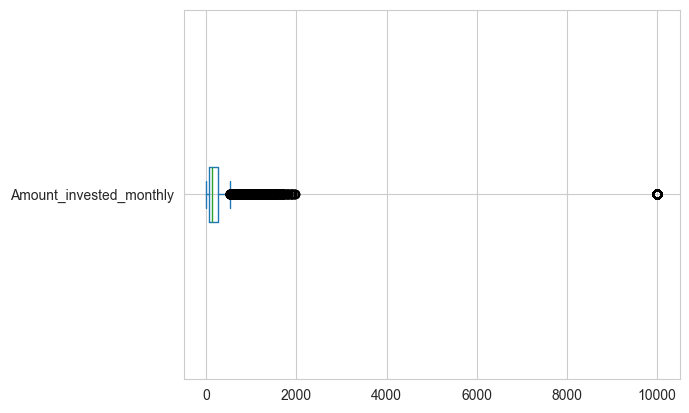

In [52]:
df['Amount_invested_monthly'].plot(kind='box', vert=0);

I will fill them with Nan values and then apply the lambda function.

In other words, for each of these groups (Customer IDs), a transformation is applied to the Amount_invested_monthly column. This transformation calculates the mode (most frequently occurring value) of Amount_invested_monthly.

In addition, there is a special condition handled here - if the mode of Amount_invested_monthly for any customer group is empty (can occur when all values are None because of the previous operation), it replaces those occurrences with np.NaN.

In [53]:
df.loc[df['Amount_invested_monthly']>=10000, 'Amount_invested_monthly'] = None

df['Amount_invested_monthly'] = df.groupby('Customer_ID')['Amount_invested_monthly'].transform(lambda x: x.mode()[0] if not x.mode().empty else np.NaN)

**Now I wil drop SSN, Month and the Name of the customer as I will not use these variables anymore (sensitive data)**

In [54]:
df = df.drop(['Name', 'SSN'], axis=1)

Also, I should better handle the missing Values of Type_of_Loan feature by filling the NaN values with 'No Data':

In [55]:
df['Type_of_Loan'].replace([np.NaN], 'No Data', inplace=True)

#gives a warning:

#### Final Checks of df Dataframe before exporting

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 26 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int32  
 3   Age                       100000 non-null  float64
 4   Occupation                100000 non-null  object 
 5   Annual_Income             100000 non-null  float64
 6   Monthly_Inhand_Salary     100000 non-null  float64
 7   Num_Bank_Accounts         100000 non-null  float64
 8   Num_Credit_Card           100000 non-null  float64
 9   Interest_Rate             100000 non-null  float64
 10  Num_of_Loan               100000 non-null  int32  
 11  Type_of_Loan              100000 non-null  object 
 12  Delay_from_due_date       100000 non-null  float64
 13  Num_of_Delayed_Payment    100000 non-null  fl

In [57]:
print('Total NaN values: '+str(df.isna().sum().sum()) )

Total NaN values: 0


In [58]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,100000.0,80631.500000,43301.486619,5634.000000,43132.750000,80631.500000,118130.250000,155629.000000
Customer_ID,100000.0,25982.666640,14340.543051,1006.000000,13664.500000,25777.000000,38385.000000,50999.000000
Month,100000.0,4.500000,2.291299,1.000000,2.750000,4.500000,6.250000,8.000000
Age,100000.0,33.311180,10.764783,14.000000,24.000000,33.000000,42.000000,56.000000
Annual_Income,100000.0,50505.123449,38299.422093,7005.930000,19342.972500,36999.705000,71683.470000,179987.280000
Monthly_Inhand_Salary,100000.0,4198.350924,3187.402015,303.645417,1626.761667,3095.978333,5961.637500,15204.633333
Num_Bank_Accounts,100000.0,5.368750,2.593095,0.000000,3.000000,5.000000,7.000000,10.000000
Num_Credit_Card,100000.0,5.533680,2.067126,0.000000,4.000000,5.000000,7.000000,11.000000
Interest_Rate,100000.0,14.532080,8.741330,1.000000,7.000000,13.000000,20.000000,34.000000
Num_of_Loan,100000.0,3.009960,62.647879,-100.000000,1.000000,3.000000,5.000000,1496.000000


## Exporting Dataframe

In [59]:
df.to_csv("data_clean/clean_dataset.csv", index=False)

In [60]:
from IPython.display import FileLink, FileLinks
file = FileLink(r'data_clean/clean_dataset.csv', result_html_prefix="Click here to download: ")
display(file)

C:\Users\vtsoumpris\DataspellProjects\Credit_Score_Classification_Project\data_clean\clean_dataset.csv

In [61]:
print('Notebook runs without errors - End of Notebook 1')

Notebook runs without errors - End of Notebook 1
